# Projeto de processamento de linguagem natural

Bem-vindo ao Projeto NLP para esta seção do curso. Neste projeto NLP, você estará tentando classificar Avaliações da Yelp em categorias de 1 estrela ou 5 estrelas com base no conteúdo do texto nas revisões. Este será um procedimento mais simples do que a palestra, pois utilizaremos os métodos do pipeline para tarefas mais complexas.

Usaremos o [Conjunto de dados de reviews da Yelp da Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Cada observação neste conjunto de dados é uma revisão de um determinado negócio por um determinado usuário.

A coluna "stars" é o número de estrelas (1 a 5) atribuídas pelo revisor ao negócio (mis estrelas é melhor.) 
A coluna "cool" é o número de votos "legais" que esta avaliação recebeu de outros usuários de usuários.

Todas as avaliações começam com 0 votos "legais", e não há limite para quantos votos "legais" podem receber uma avaliação. Em outras palavras, é uma classificação da revisão em si, não uma classificação do negócio.

As colunas "useful" e "funny" são semelhantes à coluna "cool".

Vamos começar! Basta seguir as instruções abaixo!

 ## Importações
  ** Importe as bibliotecas habituais. **

In [2]:
import pandas as pd
import numpy as np

## Os dados

** Leia o arquivo yelp.csv e configure-o como um dataframe chamado yelp. **

In [3]:
yelp = pd.read_csv("yelp.csv")

** Verifique os métodos head(), info() e describe() em yelp. **


In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


** Crie uma nova coluna chamada "comprimento do texto", que é o número de palavras na coluna de texto. **

In [7]:
yelp["lenght"] = yelp["text"].apply(len)

In [9]:
yelp["lenght"].head()

0     889
1    1345
2      76
3     419
4     469
Name: lenght, dtype: int64

0     889
1    1345
2      76
3     419
4     469
Name: text lenght, dtype: int64

# Análise exploratória de dados

Vamos explorar os dados

## Importações

** Importe as bibliotecas de visualização de dados se você ainda não o fez. **

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use("seaborn")
%matplotlib inline

** Use o FacetGrid da biblioteca seaborn para criar uma grid de 5 histogramas de comprimento de texto com base nas classificações das estrelas. Consulte a documentação Seaborn para obter dicas sobre como fazer isso, caso não lembre. **

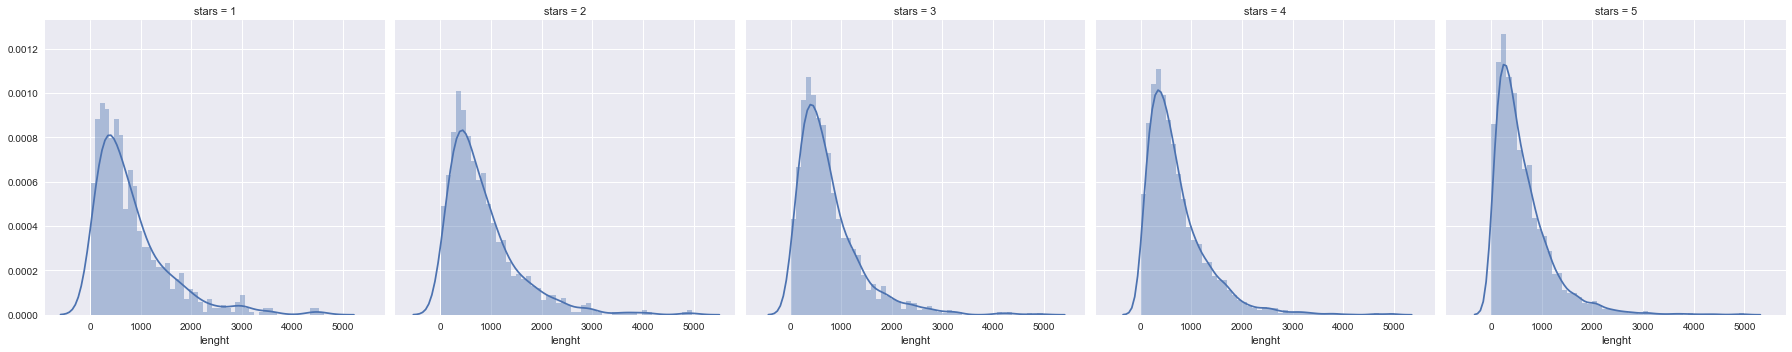

In [21]:
g = sns.FacetGrid(yelp,col="stars",size=5)
g.map(sns.distplot,"lenght",bins=50)

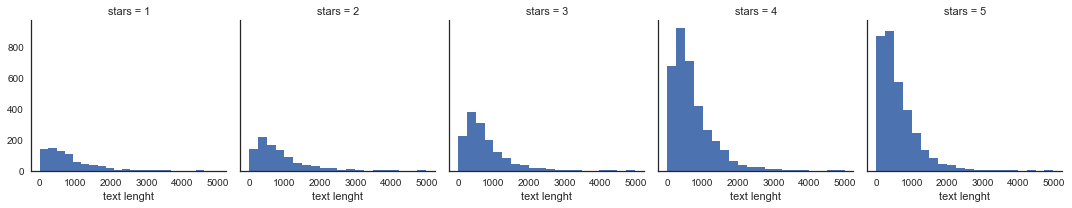

** Crie um boxplot do comprimento de texto para cada categoria de estrelas. **

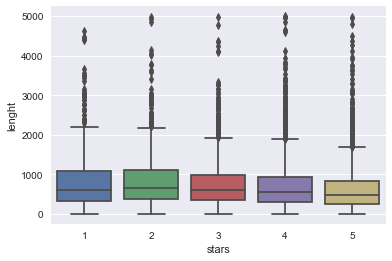

In [22]:
sns.boxplot("stars","lenght",data=yelp)

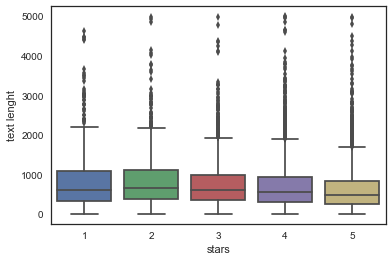

** Crie um countplot do número de ocorrências para cada tipo de classificação de estrelas. **

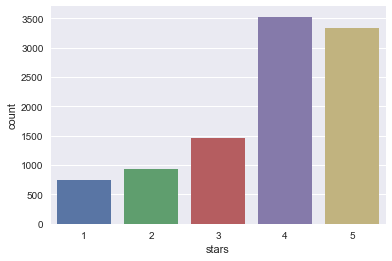

In [23]:
sns.countplot(yelp["stars"])

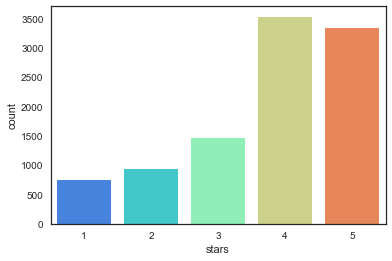

** Use groupby para obter os valores médios das colunas numéricas. **

In [27]:
stars = yelp.groupby("stars").mean()

,cool,useful,funny,text lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


** Use o método corr () nesse conjunto de dados groupby para produzir este dataframe: **

In [28]:
stars.corr()

,cool,useful,funny,lenght
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
lenght,-0.857664,0.699881,0.843461,1.000000


** Em seguida, use Seaborn para criar um heatmap com base em que .corr () dataframe: **

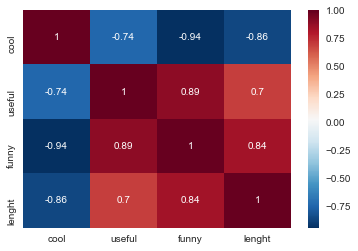

In [36]:
sns.heatmap(stars.corr(),annot=True,cmap="RdBu_r")

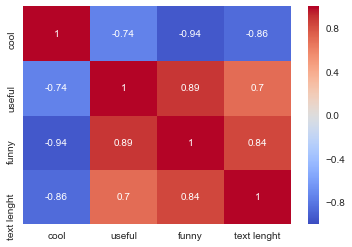

## Tarefa de classificação de PNL

Vamos passar para a tarefa atual. Para tornar as coisas um pouco mais fáceis, vá em frente e apenas pegue comentários que foram de 1 estrela ou 5 estrelas.

** Crie um banco de dados chamado yelp_class que contenha as colunas do banco de dados do yelp, mas apenas para as avaliações de 1 ou 5 estrelas. **

In [40]:
yelp_class = yelp[(yelp["stars"]==1) | (yelp["stars"]==5)]

In [41]:
yelp_class

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [48]:
yelp_class["stars"].value_counts()

5    3337
1     749
Name: stars, dtype: int64

5    3337
1     749
Name: stars, dtype: int64

** Crie dois objetos X e y. X será a coluna "texto" de yelp_class e y será a coluna 'estrelas' do yelp_class.**

In [49]:
x = yelp_class["text"]
y= yelp_class["stars"]

** Import CountVectorizer e crie um objeto CountVectorizer. **

In [52]:
from nltk.corpus import stopwords
import string

In [65]:
def text_process(x):
    n_punc = [char for char in x if char not in string.punctuation]
    n_punc = "".join(n_punc)
    msg = [word for word in n_punc.split() if word.lower() not in stopwords.words("english")]  
    return msg

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

** Use o método fit_transform no objeto CountVectorizer e passe em X (a coluna 'texto'). Salve esse resultado substituindo X. **

In [71]:
bow_transformer = CountVectorizer().fit_transform(x)

## Divisão treino-teste

Vamos dividir nossos dados em dados de treinamento e teste.

** Use train_test_split para dividir os dados em X_train, X_test, y_train, y_test. Use test_size = 0.3 e random_state = 101 **

In [69]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(bow_transformer,y,test_size=0.3,random_state=101)

## Training a Model

Tempo para treinar o modelo!

** Import MultinomialNB e crie uma instância do estimador e o chame de nb **

In [72]:
from sklearn.naive_bayes import MultinomialNB

** Agora ajuste nb usando os dados de treinamento. **

In [76]:
nb = MultinomialNB()

In [77]:
nb.fit(x_train,y_train)

MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Previsões e avaliações

Tempo para ver como nosso modelo ficou!

** Use o método predict() do nb para prever X_test. **

In [78]:
pred = nb.predict(x_test)

** Crie uma matriz de confusão e um relatório de classificação usando essas previsões e y_test **

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226

[[159  69]
 [ 22 976]]


[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



**Ótimo! Vamos ver o que acontece se tentarmos incluir o TF-IDF nesse processo usando um pipeline. **

# Usando o processamento de texto

** Importe TfidfTransformer do sklearn. **

In [82]:
from sklearn.feature_extraction.text import TfidfTransformer

** Importe pipeline da sklearn. **

In [83]:
from sklearn.pipeline import Pipeline

** Agora crie um pipeline com as seguintes etapas: CountVectorizer (), TfidfTransformer (), MultinomialNB () **

In [91]:
pipeline = Pipeline([("count",CountVectorizer()),("Tfidf",TfidfTransformer()),("nb",MultinomialNB())])

## Using the Pipeline

** Hora de usar o pipeline! Lembre-se de que este pipeline já possui todas as suas etapas de pré-processo, o que significa que precisaremos re-dividir os dados originais (Lembre-se de que sobrecarregamos o X como a versão CountVectorized. O que precisamos é apenas o texto **

### Divisão treino-teste

** Refaça a divisão treino-teste no objeto yelp_class. **

In [94]:
m_train,m_test,l_train,l_test = train_test_split(x,y,test_size=0.3,random_state=101)

** Agora ajuste o pipeline aos dados de treinamento. Lembre-se de que você não pode usar os mesmos dados de treinamento da última vez porque esses dados já foram vetados. Precisamos passar apenas no texto e nos rótulos **

In [95]:
pipeline.fit(m_train,l_train)

Pipeline(steps=[('count', CountVectorizer()), ('Tfidf', TfidfTransformer()),
                ('nb', MultinomialNB())])

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Previsões e Avaliação

** Agora use o pipeline para prever a partir do X_test e crie um relatório de classificação e uma matriz de confusão. Você deve notar resultados estranhos. **

In [97]:
predict= pipeline.predict(m_test)

In [98]:
print(classification_report(l_test,predict))

precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Parece que o Tf-Idf realmente piorou as coisas!

É isto para este projeto. 
** Algumas outras coisas para tentar .... **
Tente voltar e brincar com as etapas do pipeline e ver se criar um analisador personalizado como fizemos na aula... Ou recrie o pipeline com apenas o CountVectorizer() e NaiveBayes. A mudança do modelo ML no final para outro classificador ajudou?